**№17.78**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return x**4 + x**2 + x + 1
    
def d_f(x):
    return 4 * x**3 + 2 * x + 1
    
a = -1
b = 2

epsilon = 0.01

### Проверка выпуклости функции
Функция f является выпуклой на отрезке [a, b] , если для любого  α ∈ [0, 1] и любых x1 , x2  ∈ [a, b] выполняется условие:<br>
f(α * x1 + (1-α) * x2) <= α * f(x1) + (1-α) * f(x2)<br>
x1 $\not=$ x2

In [3]:
discr = 0.5
Alpha = np.linspace(0, 1, int(1 / discr) + 1)
X = np.linspace(a, b, int((b - a) / discr) + 1)
prov = True
for i in range(len(Alpha)): 
    for j in range(len(X)):
        for k in range(len(X)):
            alpha = Alpha[i]
            x1 = X[j] 
            x2 = X[k]
            if x1 != x2 and f(alpha*x1 + (1-alpha)*x2) > alpha*f(x1) + (1-alpha)*f(x2):
                print(alpha, x1, x2)
                prov = False
if prov:
    print('Функция выпуклая, можем применить метод касательных')
else:
    print('Функкия не выпуклая, не можем использовать метод касательных')

Функция выпуклая, можем применить метод касательных


Если f′(a) >= 0 или f′(b) <= 0, то точка a либо точка b является точкой минимума соответственно, тогда задача решена.<br>
Критерий точности |f′($c_n$)| <= 0.01

In [6]:
iteration = 0

# условие |f′(b)| <= epsilon
if d_f(b) <= epsilon:  
    c = b
    d_fc = d_f(c)
else:
    c = a
    d_fc = d_f(a)

# условие |f′(a)| <= epsilon
    if d_fc > epsilon: 
        while abs(d_fc) > epsilon: 
            c = (f(a) - f(b) + b * d_f(b) - a * d_f(a)) / (d_f(b) - d_f(a))
            d_fc = d_f(c)
            #print('Итерация', iteration + 1, ' a =', round(a,3), ' b =', round(b,3), '  c =', round(c,3), ' d_f(c) =', round(d_fc,3))

            if d_fc > 0:
                b = c # [a,c]
            else:      
                a = c # [c,b]
            iteration += 1

print('Количество итераций =',iteration)
print('Точка минимума c =', round(c,3))
print("Производная f'(c) =", round(d_fc,3))
print("f(c) =", round(f(c),3))

Количество итераций = 0
Точка минимума c = -0.386
Производная f'(c) = -0.002
f(c) = 0.785


## График

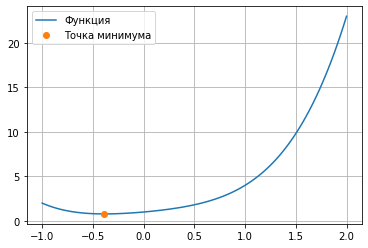

In [ ]:
x = np.linspace(-1, 2, 100)
f_x = f(x)
def_f = d_f(x)
plt.plot(x, f_x, label = 'Функция' )
plt.plot(c,f(c),'o', label ='Точка минимума' ) 
plt.legend()
plt.grid()

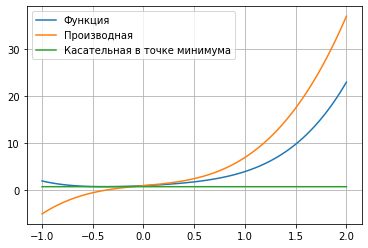

In [ ]:
kasat = f(c) + d_f(c) * (x - c)
plt.plot(x, f_x, label = 'Функция' )
plt.plot(x, def_f, label = 'Производная')
plt.plot(x, kasat, label = 'Касательная в точке минимума')
plt.legend()
plt.grid()

### Проверка графика по wolframalpha:
https://www.wolframalpha.com/input?i2d=true&i=plot+f%5C%2840%29x%5C%2841%29+%3D+Power%5Bx%2C4%5D+%2B+Power%5Bx%2C2%5D+%2B+x+%2B+1%3B+f%5C%2840%29x%5C%2841%29+%3D++4+*+Power%5Bx%2C3%5D+%2B+2+*+x+%2B+1%3B+-1+≤+x+≤+2